## Importing the dependencies

In [155]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime as dt
import matplotlib.pyplot as plt

## Load the training data

In [156]:
train = pd.read_csv('./datasets/train.csv')
train.head()

,Date,Passengers
0,2008-01-01,112
1,2008-02-01,118
2,2008-03-01,132
3,2008-04-01,129
4,2008-05-01,121


## Convert the Date (time series) to days from now (integer)

In [157]:
train['Date'] = pd.to_datetime(train['Date'])
train['Days ago'] = (dt.now() - train['Date']).dt.days
train

,Date,Passengers,Days ago
0,2008-01-01,112,5867
1,2008-02-01,118,5836
2,2008-03-01,132,5807
3,2008-04-01,129,5776
4,2008-05-01,121,5746
...,...,...,...
119,2017-12-01,337,2245
120,2018-01-01,360,2214
121,2018-02-01,342,2183
122,2018-03-01,406,2155


## Analyzing the data patterns
Because the training data has a linear trend, we chose to use the Linear Regression model.

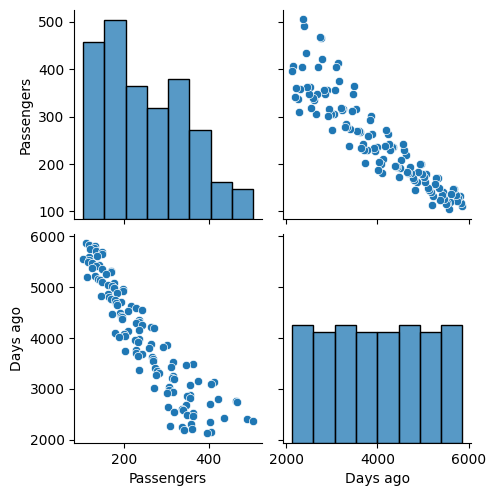

In [158]:
sns.pairplot(train)

## Creating the Linear Regression model

In [159]:
class LinearRegression:
    def __init__(self):
        # Initializing the coefficients to None. These will be updated during training.
        self.coefficients = None

    def train(self, X, y):
        # Training the linear regression model.
        # y: a 1D numpy array of target values.
        # X: a 1D numpy array of features.

        # Add a column of ones to X to account for the bias term in the linear regression equation.
        X = np.column_stack((np.ones(len(X)), X))

        # Calculate the coefficients using the normal equation method.
        # This involves a dot product between the transpose of X and y, and the inverse of the dot product of X transpose and X.
        self.coefficients = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

    def predict(self, X):
        # Making predictions based on the trained model.
        # X: a 1D numpy array of features.

        # Add a column of ones to X to account for the bias term in the linear regression equation.
        X = np.column_stack((np.ones(len(X)), X))

        # Perform a dot product between X and the coefficients to get the predictions.
        # The predictions are converted to integer values.
        return X.dot(self.coefficients).astype(np.int32)

    def mse(self, y_true, y_pred):
        # Calculating the Mean Squared Error (MSE) between the true and predicted target values.
        # y_true: a 1D numpy array of true target values.
        # y_pred: a 1D numpy array of predicted target values.

        # The MSE is the average of the squared differences between the true and predicted values.
        return np.mean((y_true - y_pred) ** 2)

    def mape(self, y_true, y_pred):
        # Calculating the Mean Absolute Percentage Error (MAPE) between the true and predicted target values.
        # y_true: a 1D numpy array of true target values.
        # y_pred: a 1D numpy array of predicted target values.

        # The MAPE is the average of the absolute percentage differences between the true and predicted values.
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


## Initialize the model

In [160]:
model = LinearRegression()

## Training the model

In [161]:
X_train = np.asarray(train['Days ago'].values.tolist())
y_train = np.asarray(train['Passengers'].values.tolist())

In [162]:
model.train(X_train, y_train)

## Testing the model

In [163]:
test = pd.read_csv('./datasets/test.csv')

In [164]:
# Converting the time series variable to integer (days from today)
test['Date'] = pd.to_datetime(test['Date'])
test['Days ago'] = (dt.now() - test['Date']).dt.days

In [165]:
X_test = np.asarray(test['Days ago'].values.tolist())
X_test

array([2094, 2063, 2033, 2002, 1971, 1941, 1910, 1880, 1849, 1818, 1790,
       1759, 1729, 1698, 1668, 1637, 1606, 1576, 1545, 1515])

In [166]:
# Printing the predictions values
predictions = model.predict(X_test)
predictions

array([403, 406, 408, 411, 413, 416, 418, 420, 423, 425, 428, 430, 433,
       435, 438, 440, 443, 445, 447, 450])

## VIsualizing with Scatter Plot

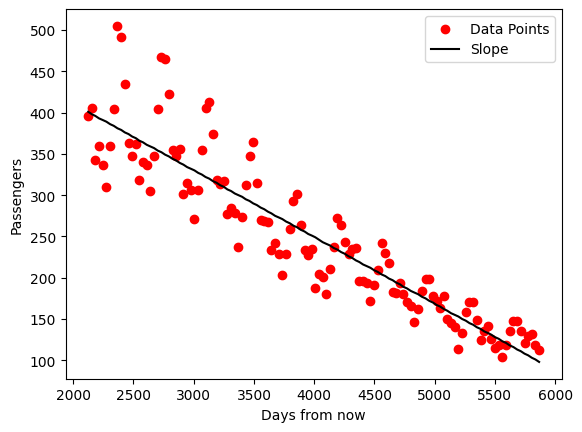

In [172]:
# Visualizing the model predictions
plt.scatter(X_train, y_train, color="red", label="Data Points")
plt.plot(X_train, model.predict(X_train), color="black", label="Slope")
plt.legend()
plt.xlabel("Days from now")
plt.ylabel("Passengers")
plt.show()

## Evaluating the model

In [168]:
# Printing the MSE
mse = model.mse(y_train, model.predict(X_train))
mse

1458.6370967741937

In [169]:
# Printing the MAPE
mape = model.mape(y_train, model.predict(X_train))
print(f"The MAPE: {mape}%")

The MAPE: 11.497609468932461%


## Writing the predictions to Submission file

In [170]:
submission = pd.DataFrame({'Date': test['Date'].values, 'Passengers': predictions})
submission.to_csv("submission.csv")
print("Successfully written the predictions to submission.csv")

Successfully written the predictions to submission.csv
